In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [3]:
df = pd.read_csv('/content/power_data.csv')

In [4]:
# Inspect the dataset
print(df.head())

  Datetime Server Datetimeserverdell  Total Load kW    kW1   kW2   kW3  AA+VC  \
0     05-04-2015/           00:58:40          20.87  10.50  5.31  5.06   0.01   
1     2015-04-05\           00:59:40          19.98  10.19  5.08  4.72   0.01   
2     2015-04-05\           01:00:40          20.22  10.00  5.17  5.06   0.01   
3     2015-04-05\           01:01:40          20.32  10.30  5.24  4.78   0.01   
4     2015-04-05\           01:02:40          20.72  10.35  5.36  5.01   0.01   

   35=ON \n0=OFF  BDI V  BDI I  ...  M OUT2 Send Start Gen 2  \
0             35  510.1    0.5  ...                        1   
1             35  509.7    0.4  ...                        1   
2             35  510.2   -0.7  ...                        1   
3             35  510.7   -3.7  ...                        1   
4             35  510.8   -4.0  ...                        1   

   M OUT4 Error Sl 1  M OUT5 Error Sl 2  M OUT6 Error Sl 3  \
0                  1                  1                  0   
1   

In [5]:
# Ensure the column name for target is 'TotalloadkW'
target_col = 'Total Load kW'

In [6]:
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[[target_col]])

In [7]:
# Prepare the sequences
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [8]:
time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)
# Reshape for LSTM [samples, time_steps, features]


In [9]:
# Train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [10]:
# LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)

Epoch 1/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - loss: 0.0229
Epoch 2/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - loss: 0.0029
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0027
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 0.0028
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - loss: 0.0027
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0024
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 0.0022
Epoch 8/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.0022
Epoch 9/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - loss: 0.0021
Epoch 10/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0017


In [12]:
# Predictions
y_pred = model.predict(X_test)

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step


In [13]:
# Inverse transform to original scale
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

In [18]:
# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)
print(f"RMSE: {rmse: 1.39234}")
print(f"MAPE: {mape: }%")
print(f"R² Score: {r2:}")

RMSE:  1.71827277380516552085509829339571297168731689453125
MAPE:  0.04326964459356623%
R² Score: 0.8783815064186093


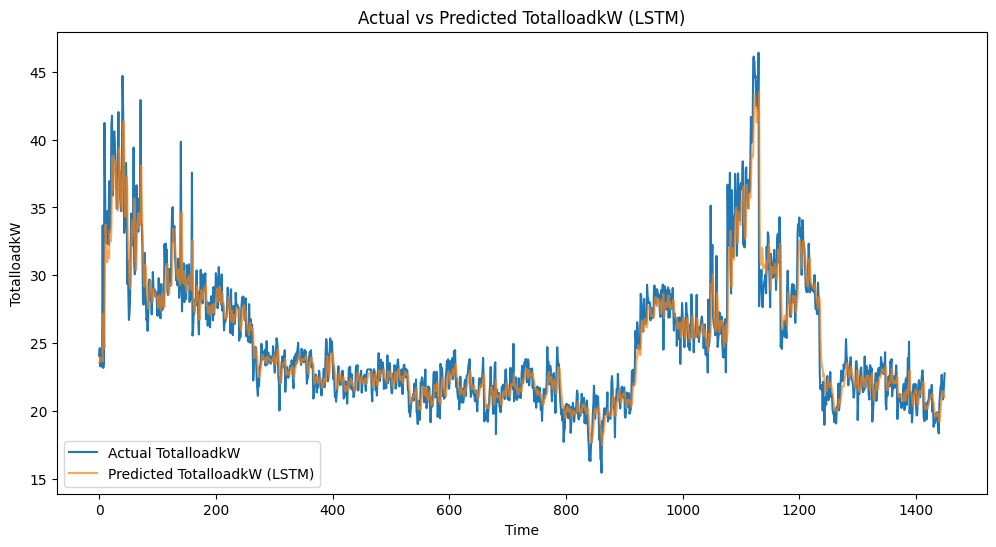

In [ ]:
# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual TotalloadkW')
plt.plot(y_pred_inv, label='Predicted TotalloadkW (LSTM)', alpha=0.7)
plt.title('Actual vs Predicted TotalloadkW (LSTM)')
plt.xlabel('Time')
plt.ylabel('TotalloadkW')
plt.legend()
plt.show()

In [ ]:
print("Total number of rows in scaled_data:", scaled_data.shape[0])

Total number of rows in scaled_data: 7310


In [ ]:
# Choose a specific time index (e.g., 43200)
time_index = 5000  # Or any value between 60 and the total number of rows
time_step = 60



In [ ]:
# Check again for safety
if time_index < time_step or time_index > scaled_data.shape[0]:
    raise ValueError(f"Invalid time_index: must be between {time_step} and {scaled_data.shape[0]}")


In [ ]:
# Prepare input sequence
input_sequence = scaled_data[time_index - time_step:time_index].reshape(1, time_step, 1)



In [ ]:
# Predict
predicted_scaled = model.predict(input_sequence)
predicted_value = scaler.inverse_transform(predicted_scaled)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [ ]:
print(f"Predicted load at time index {time_index}: {predicted_value[0][0]:.2f} kW")

Predicted load at time index 5000: 23.90 kW
